In [8]:
# ============================================================
# 01 - EXPLORATION DU DATASET
# Projet : Classification des fleurs (5 classes)
# Auteur : Aimad Oufares
# ============================================================

import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
# ------------------------------------------------------------
# 1. Configuration des chemins
# ------------------------------------------------------------

DATASET_PATH = "../data/flower_images"

classes = os.listdir(DATASET_PATH)
print("Classes détectées :", classes)


Classes détectées : ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


In [12]:
# ------------------------------------------------------------
# 2. Nombre d’images par classe
# ------------------------------------------------------------

for cls in classes:
    count = len(os.listdir(os.path.join(DATASET_PATH, cls)))
    print(f"{cls} : {count} images")


Lilly : 1000 images
Lotus : 1000 images
Orchid : 1000 images
Sunflower : 1000 images
Tulip : 1000 images


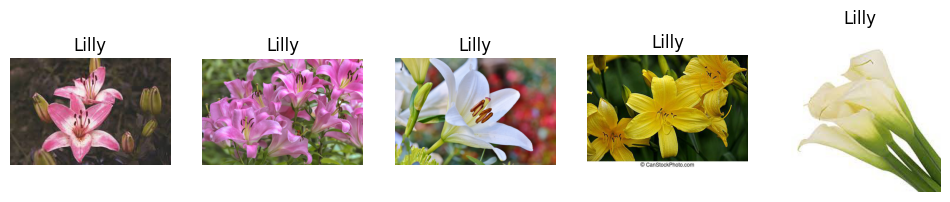

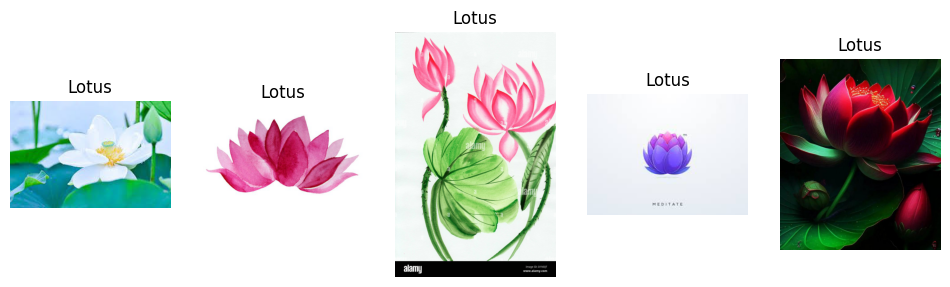

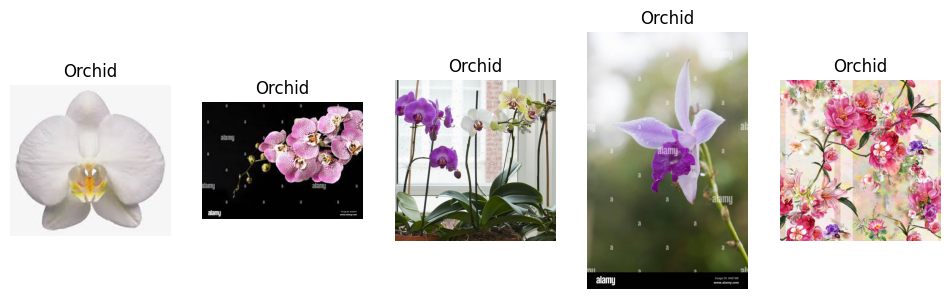

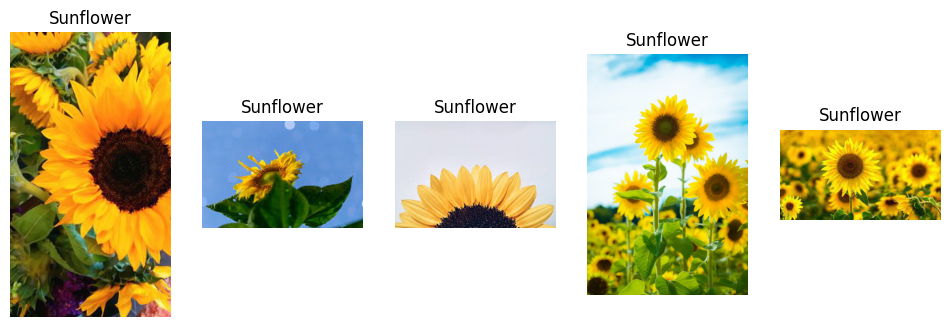

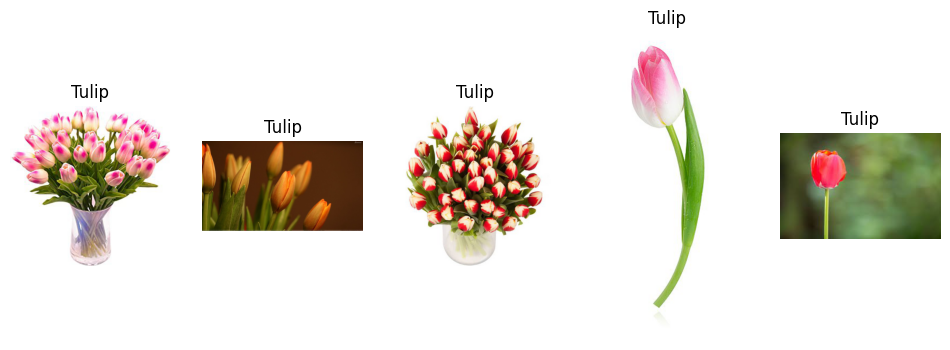

In [13]:
# ------------------------------------------------------------
# 3. Visualisation de quelques images
# ------------------------------------------------------------

def show_samples(class_name, n=5):
    path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(path)
    images = images[:n]

    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(images):
        img = plt.imread(os.path.join(path, img_name))
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Afficher des échantillons pour chaque classe
for cls in classes:
    show_samples(cls, 5)


In [14]:
# ------------------------------------------------------------
# 4. Préparation des générateurs d’images
# ------------------------------------------------------------

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

print("Classes indexées :", train_generator.class_indices)


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Classes indexées : {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}


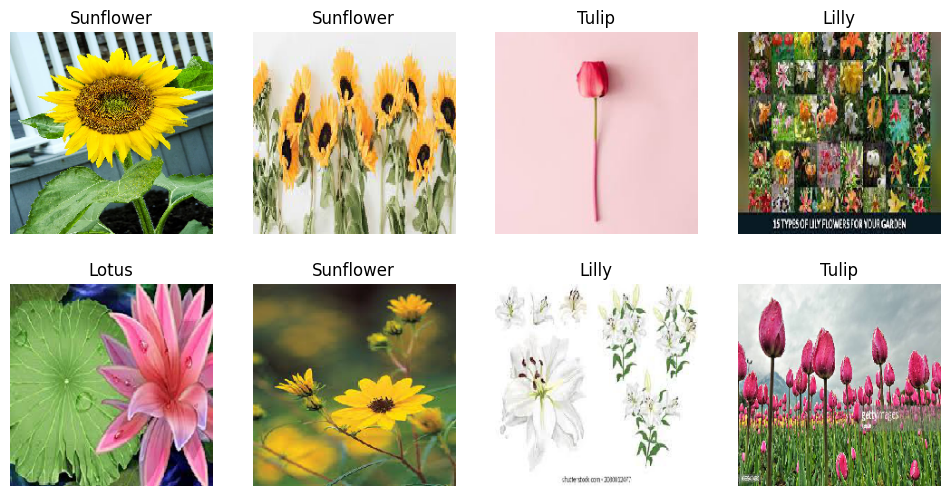

In [15]:
# ------------------------------------------------------------
# 5. Visualisation d’un batch prétraité
# ------------------------------------------------------------

sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(sample_images[i])
    label = list(train_generator.class_indices.keys())[np.argmax(sample_labels[i])]
    plt.title(label)
    plt.axis('off')

plt.show()
